
**Clase 8 - Aprendizaje Automático**
**Actividad Obligatoria: Segmentación de Clientes con K-Means**

**Estudiante:** Nancy Julieta Cassano  
**Docente:** Nicolás Caballero  
**Tecnicatura Superior en Ciencia de Datos e Inteligencia Artificial - CPS Malvinas Argentinas**  
**Año:** 2025  

In [16]:
# Carga del dataset

import pandas as pd

df = pd.read_csv('/content/kmeans_3clusters.csv')
df.head()

,purchase_freq_month,avg_basket_usd,time_on_site_min,discount_sensitivity,returns_rate,noise_gauss,noise_uniform
0,11.152508,181.300834,33.564036,1.000000,0.800000,-1.806578,-2.516905
1,12.053451,178.637272,35.432081,0.784974,0.000000,0.645129,2.115460
2,2.203006,450.185298,7.030757,0.898297,0.000000,-0.047406,-0.724173
3,4.233314,89.006342,10.834453,0.000000,0.800000,0.901700,-2.974026
4,1.716799,449.773982,7.254548,0.000000,0.003279,0.386013,2.424522


**Carga del dataset**  
Cargo el archivo `kmeans_3clusters.csv` y uso `head()` para verificar que los datos se leyeron correctamente (columnas, tipos y formato visibles en las primeras filas).


In [17]:
# Selección de variables y escalado

from sklearn.preprocessing import StandardScaler

# Selecciono sólo columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Armo la matriz X y la escalo (media 0, desvío 1)
X_num = df[num_cols].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X_num)

# Vista rápida para confirmar
X[:3], num_cols


(array([[ 1.18104766, -0.43201153,  1.3002238 ,  1.33342344,  1.29867122,
         -1.81477864, -1.49312953],
        [ 1.38269638, -0.4492187 ,  1.44497872,  0.83470573, -0.9461957 ,
          0.61601448,  1.26651426],
        [-0.82202607,  1.30503906, -0.75584112,  1.09754027, -0.9461957 ,
         -0.07061305, -0.42514329]]),
 ['purchase_freq_month',
  'avg_basket_usd',
  'time_on_site_min',
  'discount_sensitivity',
  'returns_rate',
  'noise_gauss',
  'noise_uniform'])

**Selección de variables y escalado**  
Selecciono todas las columnas numéricas del dataset y las escalo usando `StandardScaler` para que cada variable tenga **media 0 y desviación estándar 1**.  
Esto es importante porque el algoritmo **K-Means** depende de las distancias, y las variables deben estar en una misma escala para no sesgar los resultados.


In [18]:
# Barrido de K para calcular Inercia y Silhouette

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

K_values = list(range(2, 11))
inertias, silhouettes = [], []

for k in K_values:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=500, random_state=42)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X, labels))

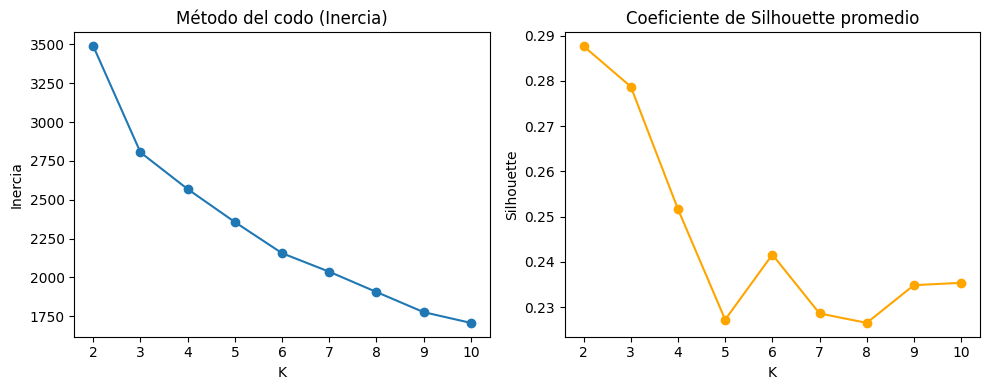

Mejor K por Inercia (mínima): 10
Mejor K por Silhouette (máxima): 2


In [19]:
# Visualización

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(K_values, inertias, marker='o')
plt.title('Método del codo (Inercia)')
plt.xlabel('K'); plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(K_values, silhouettes, marker='o', color='orange')
plt.title('Coeficiente de Silhouette promedio')
plt.xlabel('K'); plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()

best_k_inertia = K_values[int(np.argmin(inertias))]
best_k_sil = K_values[int(np.argmax(silhouettes))]

print("Mejor K por Inercia (mínima):", best_k_inertia)
print("Mejor K por Silhouette (máxima):", best_k_sil)

**Barrido de K (Inercia y Silhouette)**  
Evalúo distintos valores de **K** entre 2 y 10 para comparar dos métricas:

- **Inercia:** mide la compacidad de los grupos (cuanto menor, mejor).  
- **Silhouette:** mide la separación entre grupos (cuanto mayor, mejor).

El gráfico del codo muestra el punto donde la inercia deja de disminuir bruscamente.  

El gráfico de silhouette muestra el valor donde la separación entre clústeres es más clara.

Si ambas métricas no coinciden, se prioriza **Silhouette**.


En el gráfico del método del codo (inercia), la curva desciende rápido hasta K=3 o K=4, y después la pendiente se suaviza. Esto sugiere que el “codo” está entre K=3 y K=4, donde el modelo deja de mejorar significativamente su compacidad.

En el gráfico de silhouette, el valor máximo está en K=2 (0.29), y luego cae para valores mayores. Sin embargo, K=2 suele ser un caso demasiado simple (solo dos tipos de clientes), mientras que K=3 ofrece una separación todavía aceptable y más útil para análisis de negocio.

Conclusión: Aunque la métrica de silhouette alcanza su máximo en K=2, el gráfico del codo y el criterio práctico de segmentación indican que K=3 es un mejor compromiso entre simplicidad y separación de grupos.
En este caso, se elige K=3 como el valor óptimo.

In [20]:
# Comparar K=2, K=3 y K=4
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def train_and_report(k, X):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=500, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"K={k} | silhouette={sil:.4f} | inercia={km.inertia_:.2f}")
    return km, labels, sil, km.inertia_

km2, lab2, sil2, in2 = train_and_report(2, X)
km3, lab3, sil3, in3 = train_and_report(3, X)
km4, lab4, sil4, in4 = train_and_report(4, X)

K=2 | silhouette=0.2877 | inercia=3488.60
K=3 | silhouette=0.2787 | inercia=2804.90
K=4 | silhouette=0.2517 | inercia=2568.76


-K=2 obtiene el valor máximo de silhouette (0.2877), lo que indica la mejor separación entre grupos, pero la segmentación sería muy básica (sólo dos tipos de clientes).

-K=3 mantiene un silhouette casi igual (0.2787) y reduce significativamente la inercia, lo que indica una mejor compacidad sin pérdida relevante de separación.
Es un equilibrio óptimo entre simplicidad y representatividad.

-K=4 reduce aún más la inercia, pero el silhouette cae (0.2517),
mostrando que los grupos se mezclan más y la segmentación se vuelve menos clara.

Según las métricas de inercia y silhouette, K=3 es el número óptimo de clústeres.
Permite una estructura bien diferenciada, coherente con el gráfico del codo y más útil para interpretar los distintos perfiles de comportamiento del conjunto de datos.

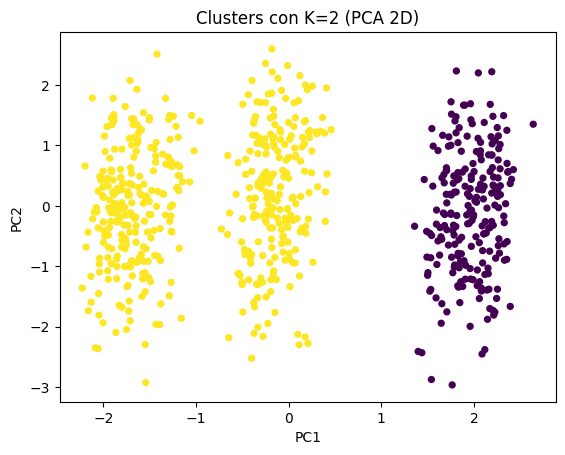

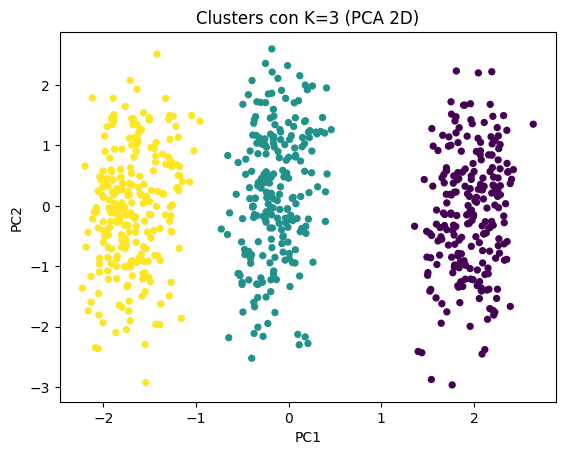

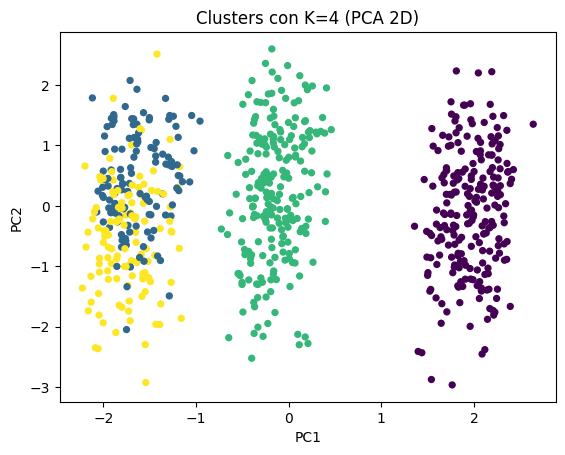

In [21]:
# PCA 2D para K=2, K=3 y K=4

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Proyección a 2 componentes para visualizar

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

def plot_clusters_2d(X2, labels, title):
    plt.figure()
    plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=18)
    plt.title(title)
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.show()

plot_clusters_2d(X2, lab2, 'Clusters con K=2 (PCA 2D)')
plot_clusters_2d(X2, lab3, 'Clusters con K=3 (PCA 2D)')
plot_clusters_2d(X2, lab4, 'Clusters con K=4 (PCA 2D)')

**Interpretación de los gráficos PCA**

**-Gráfico 1 - K = 2:**
Se observan dos grupos grandes bien definidos y separados en el eje principal. Esta configuración logra la mejor separación (silhouette = 0.2877), pero es demasiado general: agrupa comportamientos distintos dentro de un mismo clúster.

**-Gráfico 2 - K = 3:**
Aparece una estructura más detallada. Los tres grupos están bien diferenciados y mantienen una distribución equilibrada. La separación sigue siendo clara y la inercia disminuye, lo que indica que los grupos son más compactos. Este resultado refleja el punto de equilibrio entre simplicidad, separación y utilidad analítica.

**-Gráfico 3 - K = 4:**
El modelo subdivide uno de los clústeres anteriores, generando zonas de solapamiento. Aunque la inercia mejora (menor valor), la silhouette cae (0.2517), señal de que los grupos se confunden más.

**Conclusión:**

Luego de analizar las métricas y las visualizaciones, se elige K = 3 como número óptimo de clústeres.
Esta configuración logra un balance entre cohesión interna y separación externa, alineándose con el método del codo y con el criterio de priorizar silhouette cuando ambas métricas difieren.